In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns # Visualization
import matplotlib.pyplot as plt # Visualization
from colorama import Fore

from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

import warnings # Supress warnings 
warnings.filterwarnings('ignore')

np.random.seed(7)

In [2]:
df = pd.read_csv("Aquifer_Petrignano.csv")

In [3]:
df.head()

Date  Rainfall_Bastia_Umbra  Depth_to_Groundwater_P24  \
0  14/03/2006                    NaN                    -22.48   
1  15/03/2006                    NaN                    -22.38   
2  16/03/2006                    NaN                    -22.25   
3  17/03/2006                    NaN                    -22.38   
4  18/03/2006                    NaN                    -22.60   

   Depth_to_Groundwater_P25  Temperature_Bastia_Umbra  Temperature_Petrignano  \
0                    -22.18                       NaN                     NaN   
1                    -22.14                       NaN                     NaN   
2                    -22.04                       NaN                     NaN   
3                    -22.04                       NaN                     NaN   
4                    -22.04                       NaN                     NaN   

   Volume_C10_Petrignano  Hydrometry_Fiume_Chiascio_Petrignano  
0                    NaN                                   NaN  
1                    NaN                                   NaN  
2                    NaN                                   NaN  
3                    NaN                                   NaN  
4                    NaN                                   NaN

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5223 entries, 0 to 5222
Data columns (total 8 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Date                                  5223 non-null   object 
 1   Rainfall_Bastia_Umbra                 4199 non-null   float64
 2   Depth_to_Groundwater_P24              5168 non-null   float64
 3   Depth_to_Groundwater_P25              5184 non-null   float64
 4   Temperature_Bastia_Umbra              4199 non-null   float64
 5   Temperature_Petrignano                4199 non-null   float64
 6   Volume_C10_Petrignano                 5025 non-null   float64
 7   Hydrometry_Fiume_Chiascio_Petrignano  4199 non-null   float64
dtypes: float64(7), object(1)
memory usage: 326.6+ KB


In [6]:
df.isna().sum()

Date                                       0
Rainfall_Bastia_Umbra                   1024
Depth_to_Groundwater_P24                  55
Depth_to_Groundwater_P25                  39
Temperature_Bastia_Umbra                1024
Temperature_Petrignano                  1024
Volume_C10_Petrignano                    198
Hydrometry_Fiume_Chiascio_Petrignano    1024
dtype: int64

In [7]:
# keep only the rows where the column Rainfall_Bastia_Umbra is not NaN (not missing)
df = df[df.Rainfall_Bastia_Umbra.notna()].reset_index(drop=True)

In [8]:
df.head()

Date  Rainfall_Bastia_Umbra  Depth_to_Groundwater_P24  \
0  01/01/2009                    0.0                    -31.96   
1  02/01/2009                    0.0                    -32.03   
2  03/01/2009                    0.0                    -31.97   
3  04/01/2009                    0.0                    -31.91   
4  05/01/2009                    0.0                    -31.94   

   Depth_to_Groundwater_P25  Temperature_Bastia_Umbra  Temperature_Petrignano  \
0                    -31.14                       5.2                     4.9   
1                    -31.11                       2.3                     2.5   
2                    -31.07                       4.4                     3.9   
3                    -31.05                       0.8                     0.8   
4                    -31.01                      -1.9                    -2.1   

   Volume_C10_Petrignano  Hydrometry_Fiume_Chiascio_Petrignano  
0             -24530.688                                   2.4  
1             -28785.888                                   2.5  
2             -25766.208                                   2.4  
3             -27919.296                                   2.4  
4             -29854.656                                   2.3

In [9]:
# Remove not usefull columns
df = df.drop(['Depth_to_Groundwater_P24', 'Temperature_Petrignano'], axis=1)

In [10]:
# Simplify column names
df.columns = ['date', 'rainfall', 'depth_to_groundwater', 'temperature', 'drainage_volume', 'river_hydrometry']

targets = ['depth_to_groundwater']
features = [feature for feature in df.columns if feature not in targets]
df.head()

date  rainfall  depth_to_groundwater  temperature  drainage_volume  \
0  01/01/2009       0.0                -31.14          5.2       -24530.688   
1  02/01/2009       0.0                -31.11          2.3       -28785.888   
2  03/01/2009       0.0                -31.07          4.4       -25766.208   
3  04/01/2009       0.0                -31.05          0.8       -27919.296   
4  05/01/2009       0.0                -31.01         -1.9       -29854.656   

   river_hydrometry  
0               2.4  
1               2.5  
2               2.4  
3               2.4  
4               2.3

In [12]:
df['date'] = pd.to_datetime(df['date'])

In [13]:
df.head()

date  rainfall  depth_to_groundwater  temperature  drainage_volume  \
0 2009-01-01       0.0                -31.14          5.2       -24530.688   
1 2009-02-01       0.0                -31.11          2.3       -28785.888   
2 2009-03-01       0.0                -31.07          4.4       -25766.208   
3 2009-04-01       0.0                -31.05          0.8       -27919.296   
4 2009-05-01       0.0                -31.01         -1.9       -29854.656   

   river_hydrometry  
0               2.4  
1               2.5  
2               2.4  
3               2.4  
4               2.3

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4199 entries, 0 to 4198
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date                  4199 non-null   datetime64[ns]
 1   rainfall              4199 non-null   float64       
 2   depth_to_groundwater  4172 non-null   float64       
 3   temperature           4199 non-null   float64       
 4   drainage_volume       4198 non-null   float64       
 5   river_hydrometry      4199 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 197.0 KB


Features:

- **Rainfall** indicates the quantity of rain falling (mm)
- **Temperature** indicates the temperature (°C)
- **Volume** indicates the volume of water taken from the drinking water treatment plant (m 3 )
- **Hydrometry** indicates the groundwater level (m)

Target:

- **Depth to Groundwater** indicates the groundwater level (m from the ground floor)

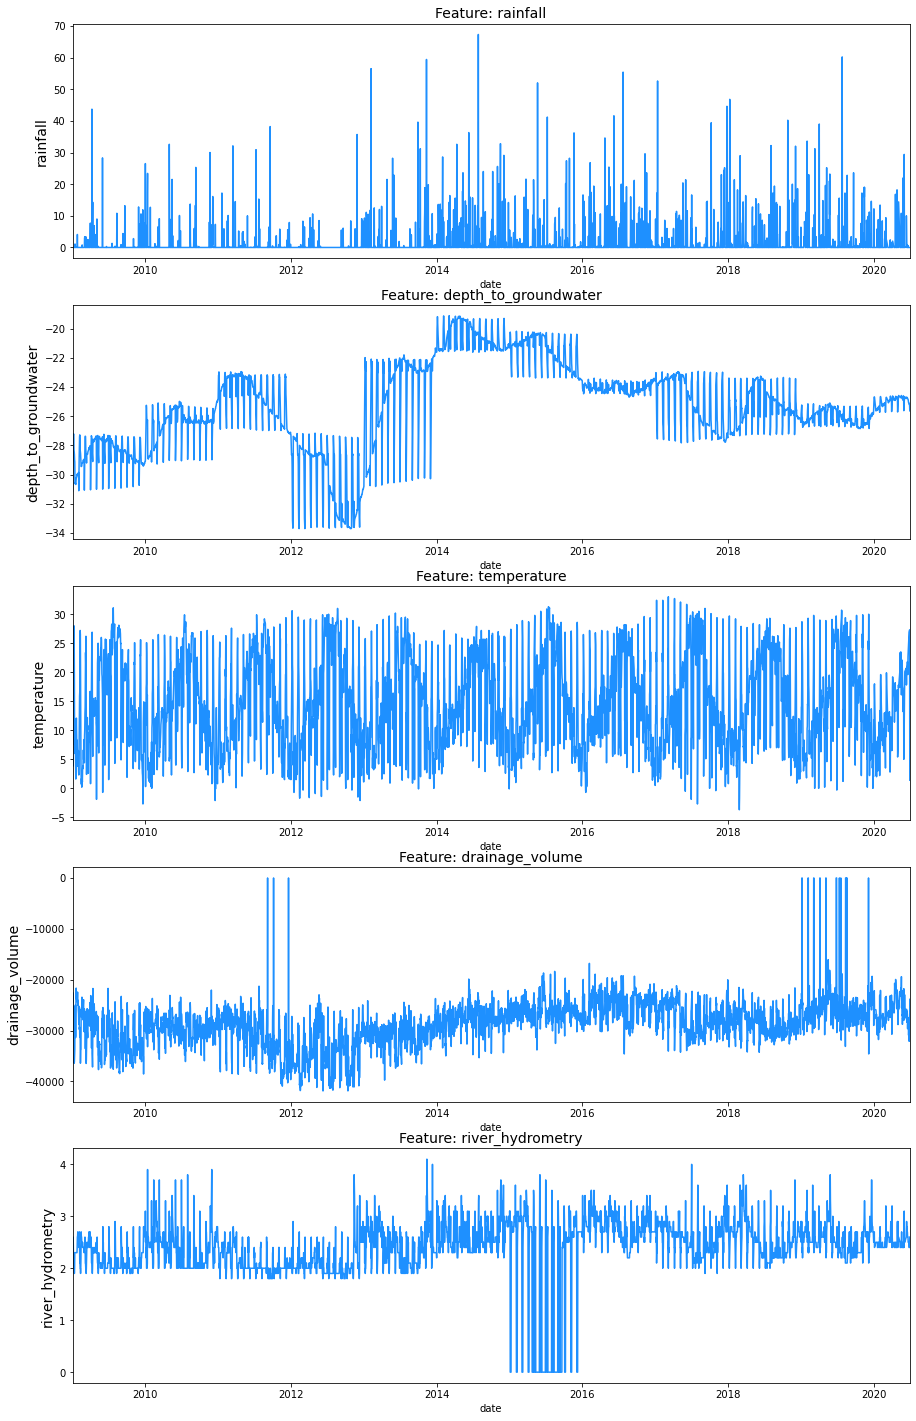

In [27]:
from datetime import date
fig, ax = plt.subplots(nrows=5,ncols =1,figsize=(15,25))
for i, column in enumerate(df.drop('date',axis=1).columns):
    sns.lineplot(x=df['date'],y=df[column].fillna(method='ffill'),ax=ax[i],color='dodgerblue')
    ax[i].set_title('Feature: {}'.format(column), fontsize=14)
    ax[i].set_ylabel(ylabel=column, fontsize=14)              
    ax[i].set_xlim([date(2009, 1, 1), date(2020, 6, 30)]) 

In [28]:
df = df.sort_values(by='date')

# Check time intervals
df['delta'] = df['date'] - df['date'].shift(1)

df[['date', 'delta']].head()

date  delta
0   2009-01-01    NaT
31  2009-01-02 1 days
59  2009-01-03 1 days
90  2009-01-04 1 days
120 2009-01-05 1 days

In [29]:
df['delta'].sum(), df['delta'].count()

(Timedelta('4357 days 00:00:00'), 4198)

In [34]:
df.set_index('date', inplace=True)


In [39]:
df = df.resample('D').asfreq()

In [41]:
df

rainfall  depth_to_groundwater  temperature  drainage_volume  \
date                                                                       
2009-01-01       0.0                -31.14          5.2       -24530.688   
2009-01-02       0.0                -29.74          3.8       -22536.576   
2009-01-03       0.0                -28.91          7.2       -26669.088   
2009-01-04       0.0                -28.03         13.6       -27028.512   
2009-01-05       0.0                -27.39         14.3       -27604.800   
...              ...                   ...          ...              ...   
2020-12-02       0.0                -25.26         10.5       -28256.256   
2020-12-03       0.0                -25.07         10.8       -26349.408   
2020-12-04       0.0                -24.96         16.0       -28938.816   
2020-12-05       0.6                -24.67         19.5       -21586.176   
2020-12-06       0.0                -24.81         19.3       -28296.864   

            river_hydrometry  delta  
date                                 
2009-01-01               2.4    NaT  
2009-01-02               2.5 1 days  
2009-01-03               2.4 1 days  
2009-01-04               2.6 1 days  
2009-01-05               2.3 1 days  
...                      ...    ...  
2020-12-02               2.4 1 days  
2020-12-03               2.7 1 days  
2020-12-04               2.5 1 days  
2020-12-05               2.4 1 days  
2020-12-06               2.7 1 days  

[4358 rows x 6 columns]

In [42]:
df = df.drop('delta', axis=1)
df.isna().sum()

rainfall                159
depth_to_groundwater    186
temperature             159
drainage_volume         160
river_hydrometry        159
dtype: int64

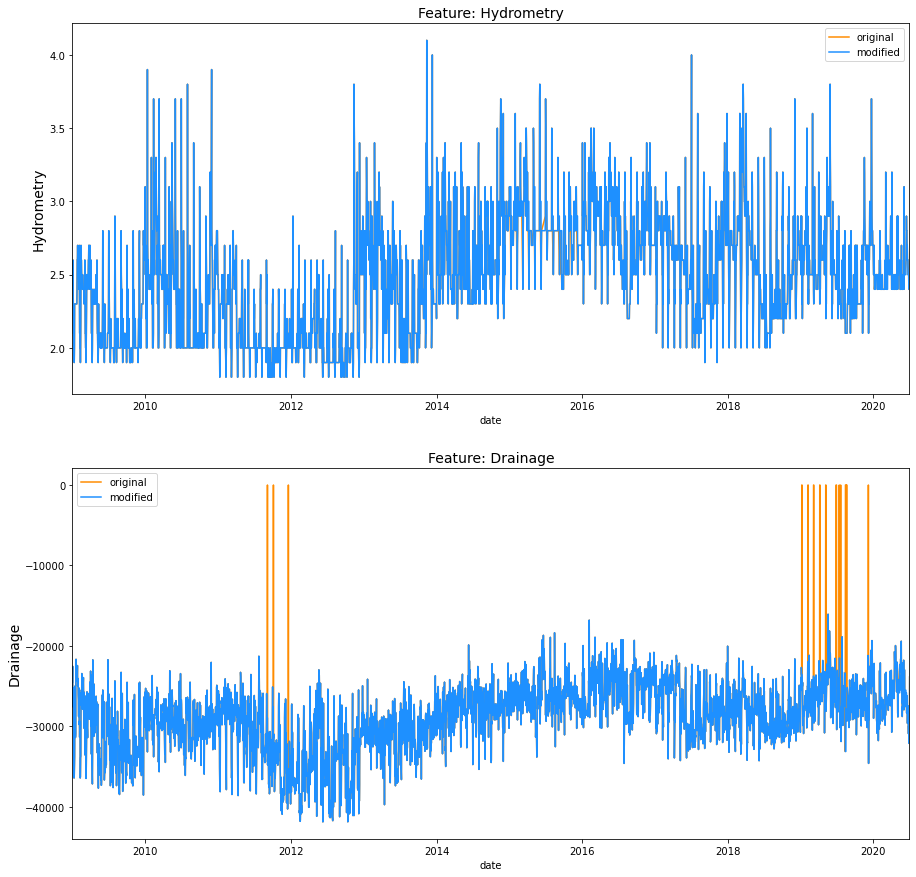

In [44]:
# Create subplots
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))

# Original and modified hydrometry
old_hydrometry = df['river_hydrometry'].copy()
df['river_hydrometry'] = df['river_hydrometry'].replace(0, np.nan)

sns.lineplot(x=df.index, y=old_hydrometry, ax=ax[0], color='darkorange', label='original')
sns.lineplot(x=df.index, y=df['river_hydrometry'].fillna(method='ffill'), ax=ax[0], color='dodgerblue', label='modified')
ax[0].set_title('Feature: Hydrometry', fontsize=14)
ax[0].set_ylabel('Hydrometry', fontsize=14)
ax[0].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])
ax[0].legend()

# Original and modified drainage volume
old_drainage = df['drainage_volume'].copy()
df['drainage_volume'] = df['drainage_volume'].replace(0, np.nan)

sns.lineplot(x=df.index, y=old_drainage, ax=ax[1], color='darkorange', label='original')
sns.lineplot(x=df.index, y=df['drainage_volume'].fillna(method='ffill'), ax=ax[1], color='dodgerblue', label='modified')
ax[1].set_title('Feature: Drainage', fontsize=14)
ax[1].set_ylabel('Drainage', fontsize=14)
ax[1].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])
ax[1].legend()

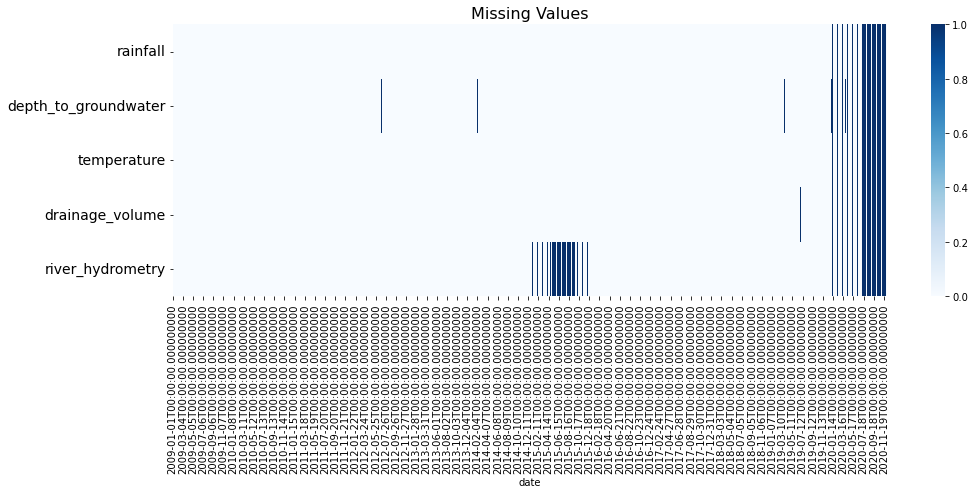

In [45]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,5))

sns.heatmap(df.T.isna(), cmap='Blues')
ax.set_title('Missing Values', fontsize=16)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)
plt.show()

Missing Values, how to handle
- Option 1: Fill NaN with Outlier or Zero
In this specific example filling the missing value with an outlier value such as np.inf or 0 seems to be very naive. However, using values like -999, is sometimes a good idea.

- Option 2: Fill NaN with Mean Value
Filling NaNs with the mean value is also not sufficient and naive, and doesn't seems to be a good option.

- Option 3: Fill NaN with Last Value with .ffill()
Filling NaNs with the last value could be bit better.

- Option 4: Fill NaN with Linearly Interpolated Value with .interpolate()
Filling NaNs with the interpolated values is the best option in this small examlple but it requires knowledge of the neighouring value

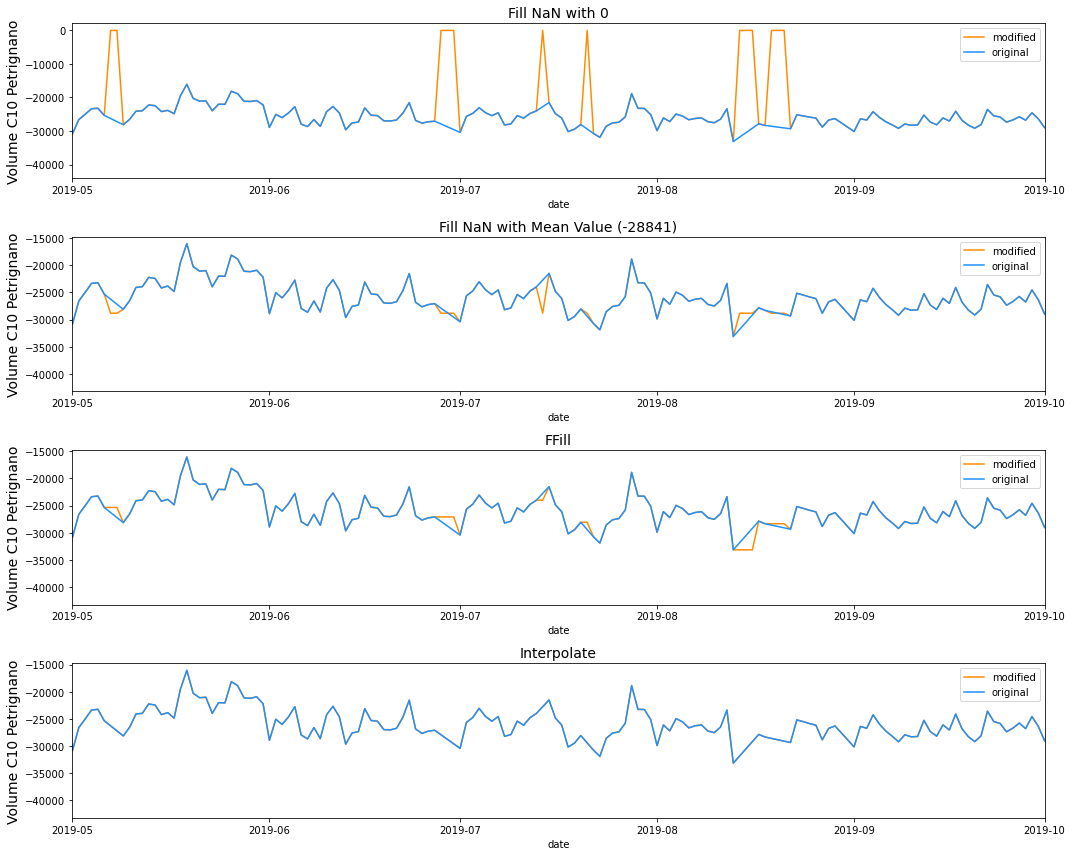

In [47]:
# Create subplots
f, ax = plt.subplots(nrows=4, ncols=1, figsize=(15, 12))

# Fill NaN with 0
sns.lineplot(x=df.index, y=df['drainage_volume'].fillna(0), ax=ax[0], color='darkorange', label='modified')
sns.lineplot(x=df.index, y=df['drainage_volume'].fillna(np.nan), ax=ax[0], color='dodgerblue', label='original')
ax[0].set_title('Fill NaN with 0', fontsize=14)
ax[0].set_ylabel('Volume C10 Petrignano', fontsize=14)

# Fill NaN with mean value
mean_drainage = df['drainage_volume'].mean()
sns.lineplot(x=df.index, y=df['drainage_volume'].fillna(mean_drainage), ax=ax[1], color='darkorange', label='modified')
sns.lineplot(x=df.index, y=df['drainage_volume'].fillna(np.nan), ax=ax[1], color='dodgerblue', label='original')
ax[1].set_title(f'Fill NaN with Mean Value ({mean_drainage:.0f})', fontsize=14)
ax[1].set_ylabel('Volume C10 Petrignano', fontsize=14)

# Fill NaN with forward fill
sns.lineplot(x=df.index, y=df['drainage_volume'].ffill(), ax=ax[2], color='darkorange', label='modified')
sns.lineplot(x=df.index, y=df['drainage_volume'].fillna(np.nan), ax=ax[2], color='dodgerblue', label='original')
ax[2].set_title('FFill', fontsize=14)
ax[2].set_ylabel('Volume C10 Petrignano', fontsize=14)

# Fill NaN with interpolation
sns.lineplot(x=df.index, y=df['drainage_volume'].interpolate(), ax=ax[3], color='darkorange', label='modified')
sns.lineplot(x=df.index, y=df['drainage_volume'].fillna(np.nan), ax=ax[3], color='dodgerblue', label='original')
ax[3].set_title('Interpolate', fontsize=14)
ax[3].set_ylabel('Volume C10 Petrignano', fontsize=14)

# Set x-axis limits for all subplots
for i in range(4):
    ax[i].set_xlim([date(2019, 5, 1), date(2019, 10, 1)])

plt.tight_layout()
plt.show()

In [48]:
df['drainage_volume'] = df['drainage_volume'].interpolate()
df['river_hydrometry'] = df['river_hydrometry'].interpolate()
df['depth_to_groundwater'] = df['depth_to_groundwater'].interpolate()

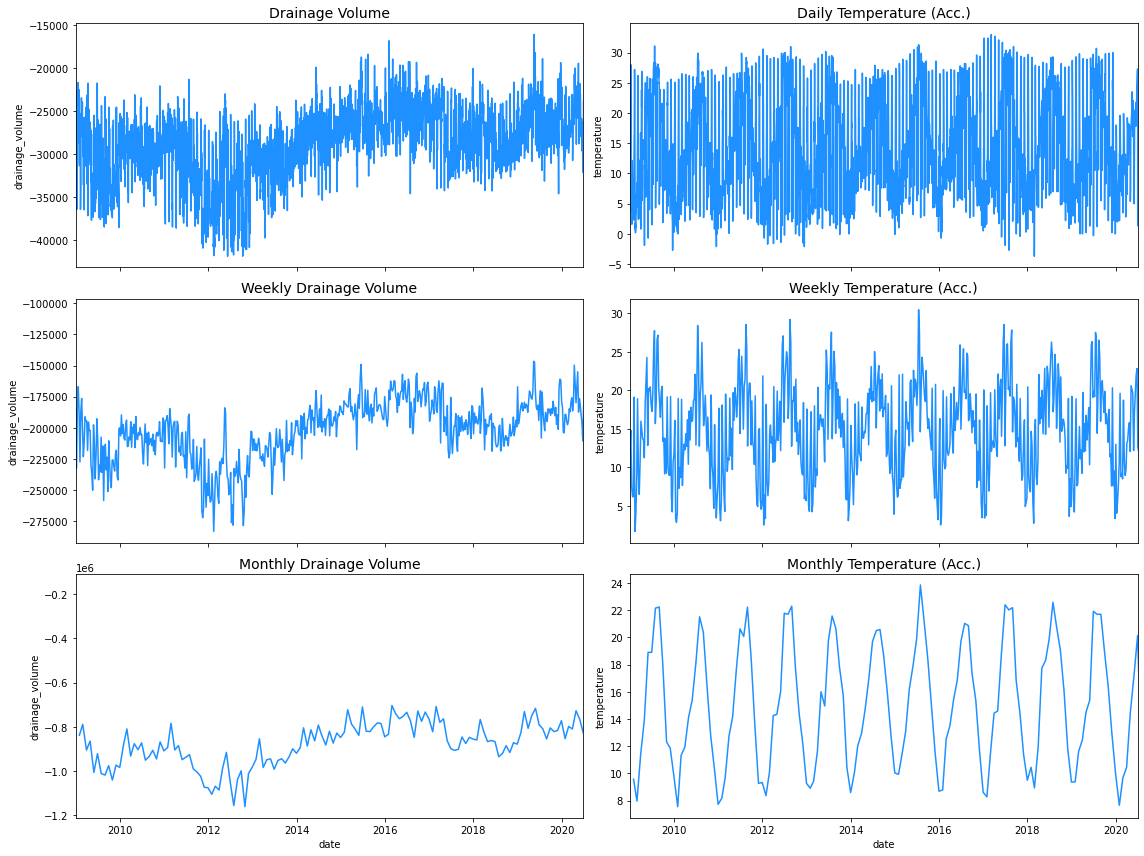

In [49]:
# Create subplots
fig, ax = plt.subplots(ncols=2, nrows=3, sharex=True, figsize=(16,12))

# Daily Drainage Volume
sns.lineplot(x=df.index, y=df['drainage_volume'], color='dodgerblue', ax=ax[0, 0])
ax[0, 0].set_title('Drainage Volume', fontsize=14)

# Weekly Drainage Volume
resampled_df = df[['drainage_volume']].resample('7D').sum().reset_index()
sns.lineplot(x=resampled_df['date'], y=resampled_df['drainage_volume'], color='dodgerblue', ax=ax[1, 0])
ax[1, 0].set_title('Weekly Drainage Volume', fontsize=14)

# Monthly Drainage Volume
resampled_df = df[['drainage_volume']].resample('M').sum().reset_index()
sns.lineplot(x=resampled_df['date'], y=resampled_df['drainage_volume'], color='dodgerblue', ax=ax[2, 0])
ax[2, 0].set_title('Monthly Drainage Volume', fontsize=14)

# Set x-axis limits
for i in range(3):
    ax[i, 0].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])

# Daily Temperature
sns.lineplot(x=df.index, y=df['temperature'], color='dodgerblue', ax=ax[0, 1])
ax[0, 1].set_title('Daily Temperature (Acc.)', fontsize=14)

# Weekly Temperature
resampled_df = df[['temperature']].resample('7D').mean().reset_index()
sns.lineplot(x=resampled_df['date'], y=resampled_df['temperature'], color='dodgerblue', ax=ax[1, 1])
ax[1, 1].set_title('Weekly Temperature (Acc.)', fontsize=14)

# Monthly Temperature
resampled_df = df[['temperature']].resample('M').mean().reset_index()
sns.lineplot(x=resampled_df['date'], y=resampled_df['temperature'], color='dodgerblue', ax=ax[2, 1])
ax[2, 1].set_title('Monthly Temperature (Acc.)', fontsize=14)

# Set x-axis limits
for i in range(3):
    ax[i, 1].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])

plt.tight_layout()
plt.show()

In [52]:
# Perform resampling and calculate the mean for each 7-day period
downsample = df[['depth_to_groundwater', 
                 'temperature',
                 'drainage_volume', 
                 'river_hydrometry',
                 'rainfall'
                ]].resample('7D').mean().reset_index(drop=False)

# Copy the downsampled DataFrame
df = downsample.copy()

In [55]:
df = df.set_index('date')

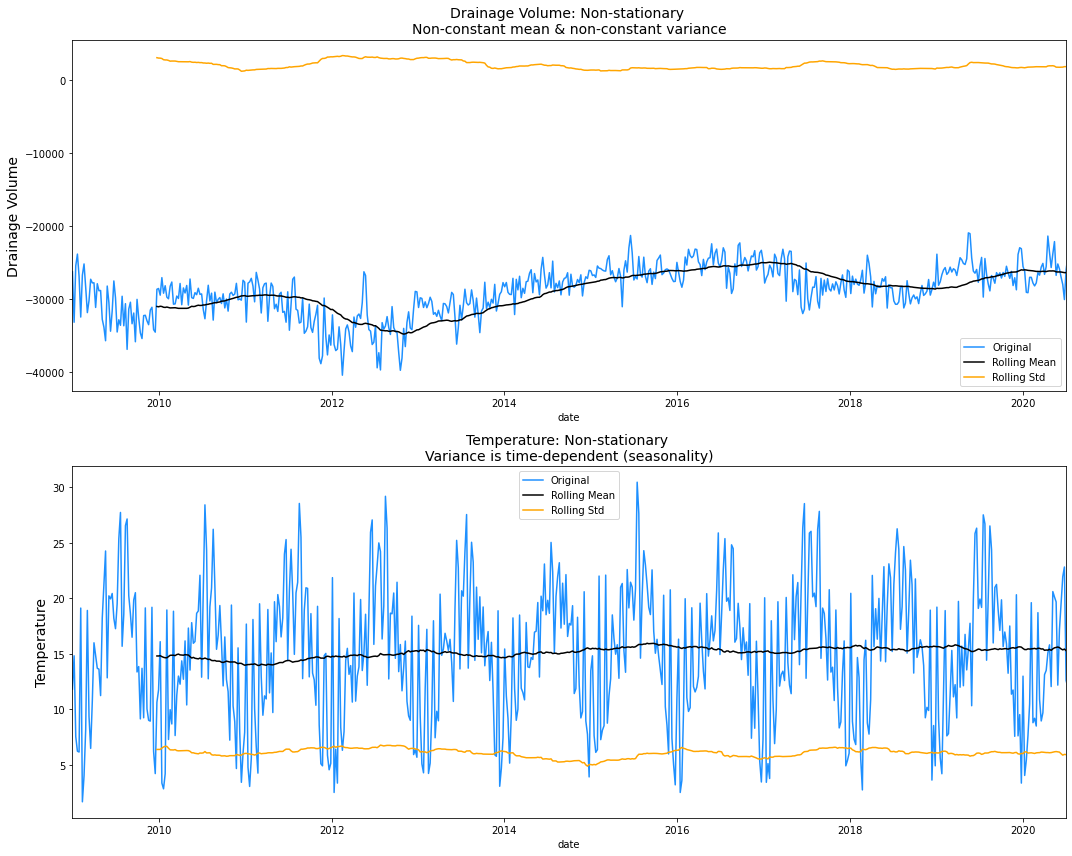

In [57]:
# Parameters
rolling_window = 52
# Create subplots
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 12))

# Plot for drainage volume
sns.lineplot(x=df.index, y=df['drainage_volume'], ax=ax[0], color='dodgerblue', label='Original')
sns.lineplot(x=df.index, y=df['drainage_volume'].rolling(rolling_window).mean(), ax=ax[0], color='black', label='Rolling Mean')
sns.lineplot(x=df.index, y=df['drainage_volume'].rolling(rolling_window).std(), ax=ax[0], color='orange', label='Rolling Std')
ax[0].set_title('Drainage Volume: Non-stationary \nNon-constant mean & non-constant variance', fontsize=14)
ax[0].set_ylabel('Drainage Volume', fontsize=14)
ax[0].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])
ax[0].legend()

# Plot for temperature
sns.lineplot(x=df.index, y=df['temperature'], ax=ax[1], color='dodgerblue', label='Original')
sns.lineplot(x=df.index, y=df['temperature'].rolling(rolling_window).mean(), ax=ax[1], color='black', label='Rolling Mean')
sns.lineplot(x=df.index, y=df['temperature'].rolling(rolling_window).std(), ax=ax[1], color='orange', label='Rolling Std')
ax[1].set_title('Temperature: Non-stationary \nVariance is time-dependent (seasonality)', fontsize=14)
ax[1].set_ylabel('Temperature', fontsize=14)
ax[1].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])
ax[1].legend()

plt.tight_layout()
plt.show()

In [58]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['depth_to_groundwater'].values)
result

(-2.4097117575256184,
 0.13901407795618814,
 18,
 604,
 {'1%': -3.4412230283528937,
  '5%': -2.8663370524631344,
  '10%': -2.5693247196394893},
 1230.2313672455493)

In [60]:
df.isna().sum()

depth_to_groundwater     0
temperature             13
drainage_volume          0
river_hydrometry         0
rainfall                13
dtype: int64

In [61]:
df['temperature'] = df['temperature'].interpolate()
df['rainfall'] = df['rainfall'].interpolate()

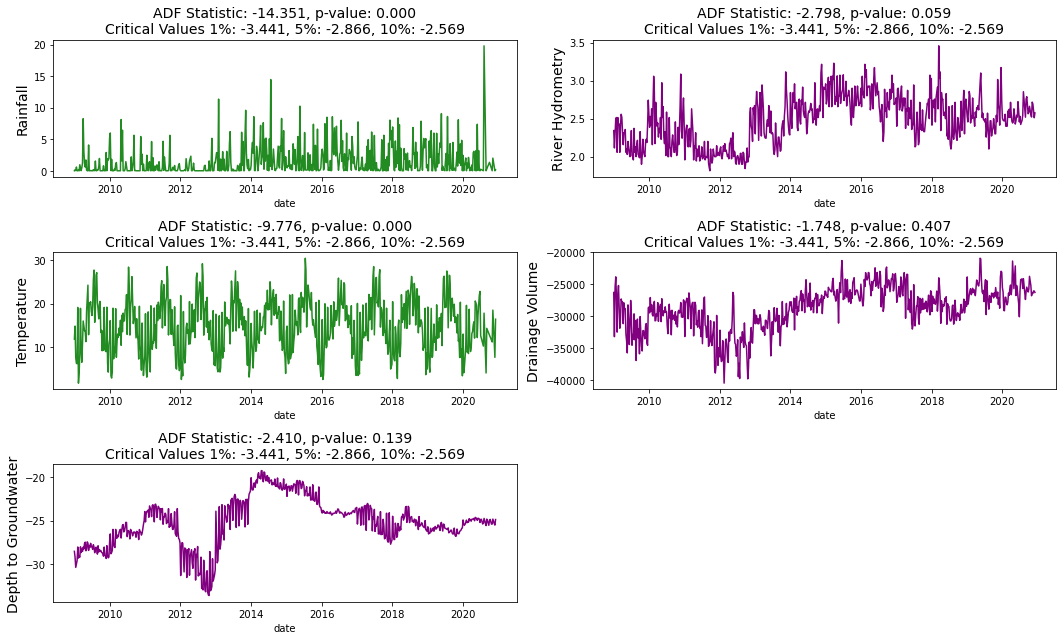

In [62]:
# Create subplots
f, ax = plt.subplots(nrows=3, ncols=2, figsize=(15, 9))

def visualize_adfuller_results(series, title, ax):
    result = adfuller(series)
    significance_level = 0.05
    adf_stat = result[0]
    p_val = result[1]
    crit_val_1 = result[4]['1%']
    crit_val_5 = result[4]['5%']
    crit_val_10 = result[4]['10%']

    if (p_val < significance_level) & (adf_stat < crit_val_1):
        linecolor = 'forestgreen'  # Strong evidence against null hypothesis
    elif (p_val < significance_level) & (adf_stat < crit_val_5):
        linecolor = 'orange'       # Moderate evidence against null hypothesis
    elif (p_val < significance_level) & (adf_stat < crit_val_10):
        linecolor = 'red'          # Weak evidence against null hypothesis
    else:
        linecolor = 'purple'       # Insufficient evidence against null hypothesis

    sns.lineplot(x=df.index, y=series, ax=ax, color=linecolor)
    ax.set_title(f'ADF Statistic: {adf_stat:0.3f}, p-value: {p_val:0.3f}\nCritical Values 1%: {crit_val_1:0.3f}, 5%: {crit_val_5:0.3f}, 10%: {crit_val_10:0.3f}', fontsize=14)
    ax.set_ylabel(ylabel=title, fontsize=14)

# Visualize ADF results for different series
visualize_adfuller_results(df['rainfall'], 'Rainfall', ax[0, 0])
visualize_adfuller_results(df['temperature'], 'Temperature', ax[1, 0])
visualize_adfuller_results(df['river_hydrometry'], 'River Hydrometry', ax[0, 1])
visualize_adfuller_results(df['drainage_volume'], 'Drainage Volume', ax[1, 1])
visualize_adfuller_results(df['depth_to_groundwater'], 'Depth to Groundwater', ax[2, 0])

# Remove the unused subplot
f.delaxes(ax[2, 1])

# Adjust layout
plt.tight_layout()
plt.show()

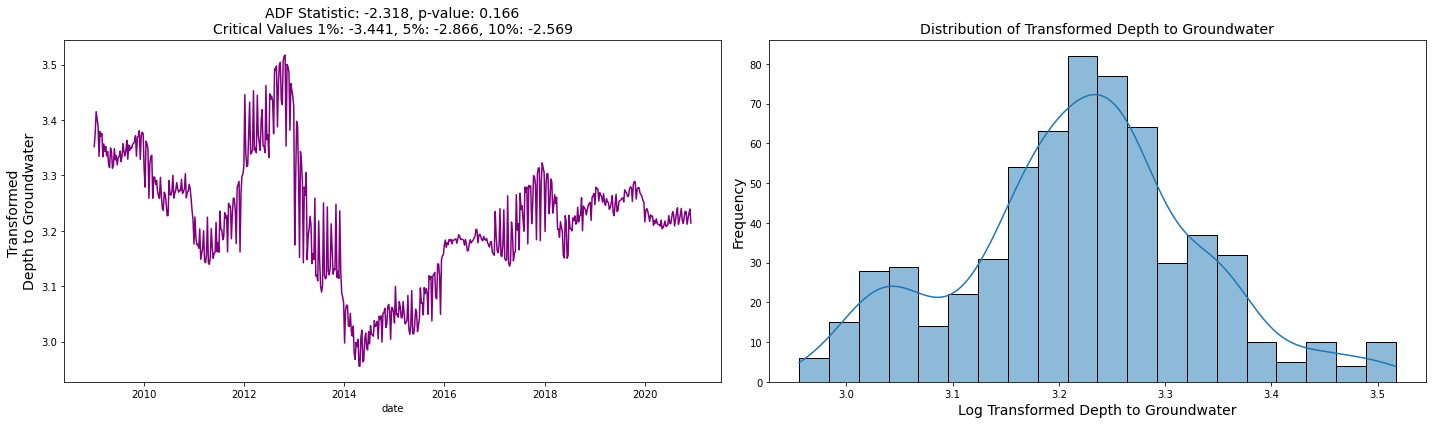

In [64]:
df['depth_to_groundwater_log'] = np.log(df['depth_to_groundwater'].replace(0, np.nan).abs())

# Create subplots
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

# Plot ADF test results for the transformed series
visualize_adfuller_results(df['depth_to_groundwater_log'], 'Transformed \nDepth to Groundwater', ax[0])

# Plot distribution of the transformed series
sns.histplot(df['depth_to_groundwater_log'].dropna(), kde=True, ax=ax[1])
ax[1].set_title('Distribution of Transformed Depth to Groundwater', fontsize=14)
ax[1].set_xlabel('Log Transformed Depth to Groundwater', fontsize=14)
ax[1].set_ylabel('Frequency', fontsize=14)

plt.tight_layout()
plt.show()

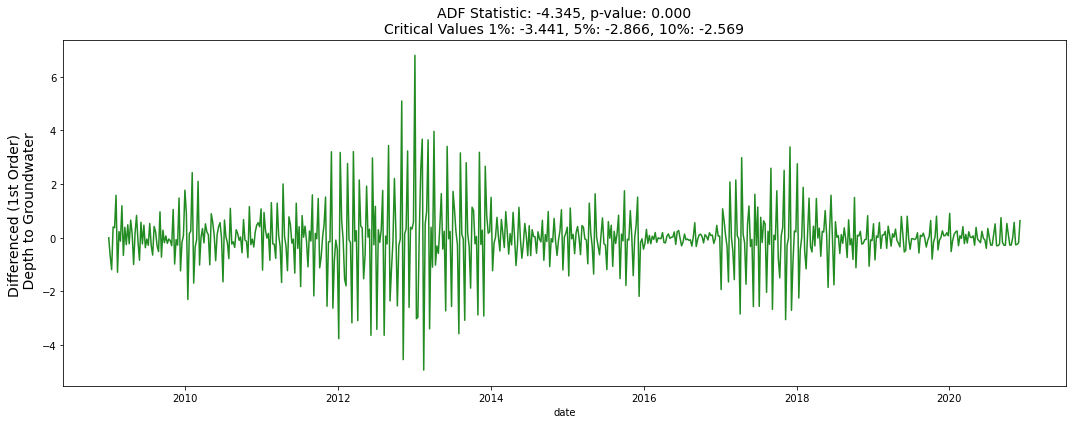

In [68]:
# Apply first-order differencing
ts_diff = np.diff(df['depth_to_groundwater'].dropna())
df['depth_to_groundwater_diff_1'] = np.append([0], ts_diff)  # Use np.nan for the first value

# Create subplots
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 6))

# Plot ADF test results for the differenced series
visualize_adfuller_results(df['depth_to_groundwater_diff_1'], 'Differenced (1st Order) \n Depth to Groundwater', ax)

plt.tight_layout()
plt.show()

In [70]:
# Extract time-related features from the index
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day
df['day_of_year'] = df.index.day_of_year
df['week_of_year'] = df.index.isocalendar().week
df['quarter'] = df.index.quarter
df['season'] = df.index.month % 12 // 3 + 1

# Display the extracted features
df[['year', 'month', 'day', 'day_of_year', 'week_of_year', 'quarter', 'season']].head()

year  month  day  day_of_year  week_of_year  quarter  season
date                                                                    
2009-01-01  2009      1    1            1             1        1       1
2009-01-08  2009      1    8            8             2        1       1
2009-01-15  2009      1   15           15             3        1       1
2009-01-22  2009      1   22           22             4        1       1
2009-01-29  2009      1   29           29             5        1       1

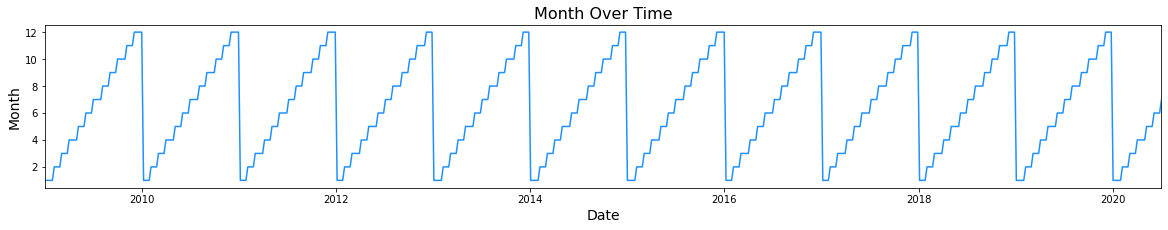

In [71]:
# Define the figure and axis
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 3))

# Plot the data
sns.lineplot(x=df.index, y=df['month'], color='dodgerblue', ax=ax)
ax.set_title('Month Over Time', fontsize=16)
ax.set_ylabel('Month', fontsize=14)
ax.set_xlabel('Date', fontsize=14)
ax.set_xlim([pd.Timestamp('2009-01-01'), pd.Timestamp('2020-06-30')])

# Display the plot
plt.show()

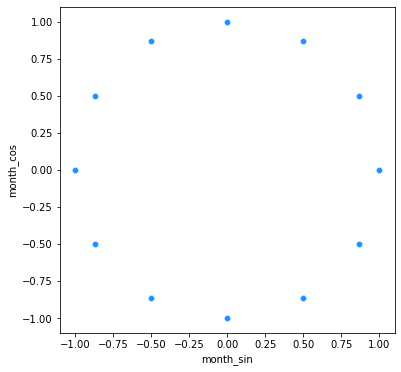

In [72]:
month_in_year = 12
df['month_sin'] = np.sin(2*np.pi*df['month']/month_in_year)
df['month_cos'] = np.cos(2*np.pi*df['month']/month_in_year)

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))

sns.scatterplot(x=df.month_sin, y=df.month_cos, color='dodgerblue')
plt.show()

In [73]:
from statsmodels.tsa.seasonal import seasonal_decompose

core_columns =  [
    'rainfall', 'temperature', 'drainage_volume', 
    'river_hydrometry', 'depth_to_groundwater'
]

for column in core_columns:
    decomp = seasonal_decompose(df[column], period=52, model='additive', extrapolate_trend='freq')
    df[f"{column}_trend"] = decomp.trend
    df[f"{column}_seasonal"] = decomp.seasonal

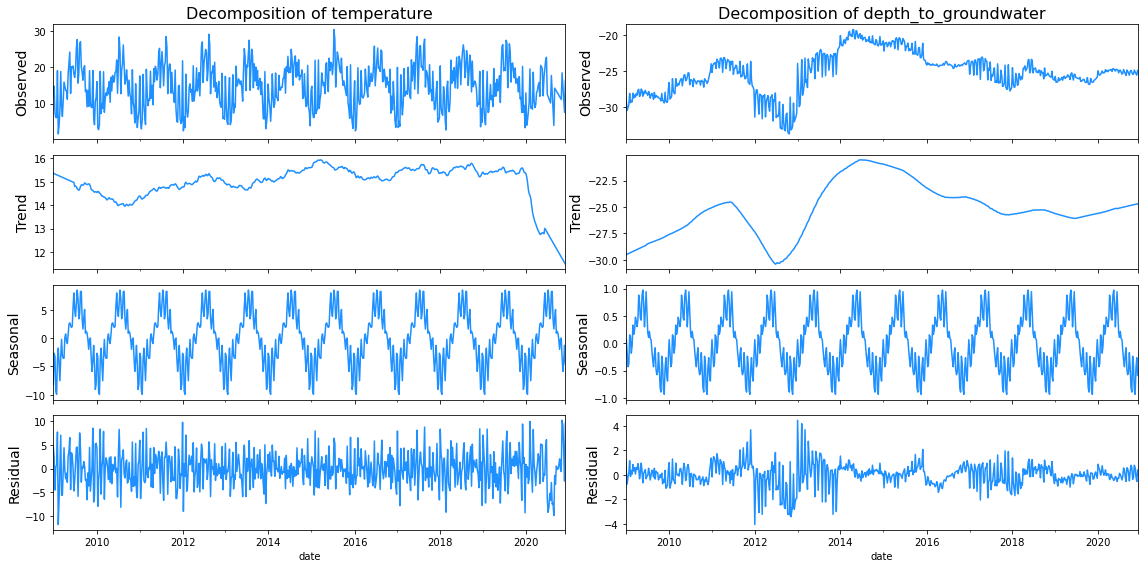

In [74]:
# Define the figure and axes
fig, ax = plt.subplots(ncols=2, nrows=4, sharex=True, figsize=(16, 8))

# List of columns to decompose
columns = ['temperature', 'depth_to_groundwater']

for i, column in enumerate(columns):
    # Decompose the time series
    res = seasonal_decompose(df[column].dropna(), period=52, model='additive', extrapolate_trend='freq')

    # Plot the observed component
    ax[0,i].set_title('Decomposition of {}'.format(column), fontsize=16)
    res.observed.plot(ax=ax[0,i], legend=False, color='dodgerblue')
    ax[0,i].set_ylabel('Observed', fontsize=14)

    # Plot the trend component
    res.trend.plot(ax=ax[1,i], legend=False, color='dodgerblue')
    ax[1,i].set_ylabel('Trend', fontsize=14)

    # Plot the seasonal component
    res.seasonal.plot(ax=ax[2,i], legend=False, color='dodgerblue')
    ax[2,i].set_ylabel('Seasonal', fontsize=14)

    # Plot the residual component
    res.resid.plot(ax=ax[3,i], legend=False, color='dodgerblue')
    ax[3,i].set_ylabel('Residual', fontsize=14)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

In [75]:
weeks_in_month = 4

for column in core_columns:
    df[f'{column}_seasonal_shift_b_2m'] = df[f'{column}_seasonal'].shift(-2 * weeks_in_month)
    df[f'{column}_seasonal_shift_b_1m'] = df[f'{column}_seasonal'].shift(-1 * weeks_in_month)
    df[f'{column}_seasonal_shift_1m'] = df[f'{column}_seasonal'].shift(1 * weeks_in_month)
    df[f'{column}_seasonal_shift_2m'] = df[f'{column}_seasonal'].shift(2 * weeks_in_month)
    df[f'{column}_seasonal_shift_3m'] = df[f'{column}_seasonal'].shift(3 * weeks_in_month)

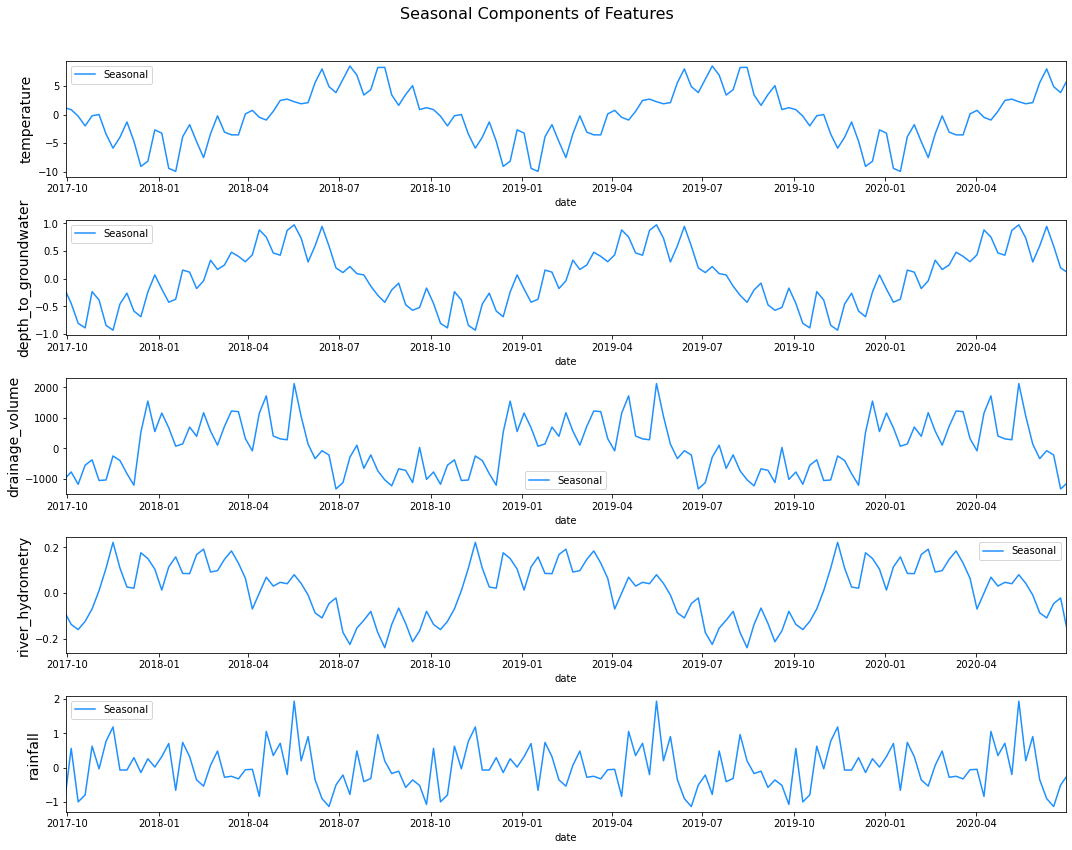

In [76]:
# Example placeholder for core_columns
core_columns = ['temperature', 'depth_to_groundwater', 'drainage_volume', 'river_hydrometry', 'rainfall']

# Define the figure and axis
f, ax = plt.subplots(nrows=len(core_columns), ncols=1, figsize=(15, 12))
f.suptitle('Seasonal Components of Features', fontsize=16)

# Plot seasonal components for each feature
for i, column in enumerate(core_columns):
    sns.lineplot(x=df.index, y=df[column + '_seasonal'], ax=ax[i], color='dodgerblue', label='Seasonal')
    ax[i].set_ylabel(ylabel=column, fontsize=14)
    ax[i].set_xlim([pd.Timestamp('2017-09-30'), pd.Timestamp('2020-06-30')])

# Adjust layout and display the plot
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust rect to make room for suptitle
plt.show()

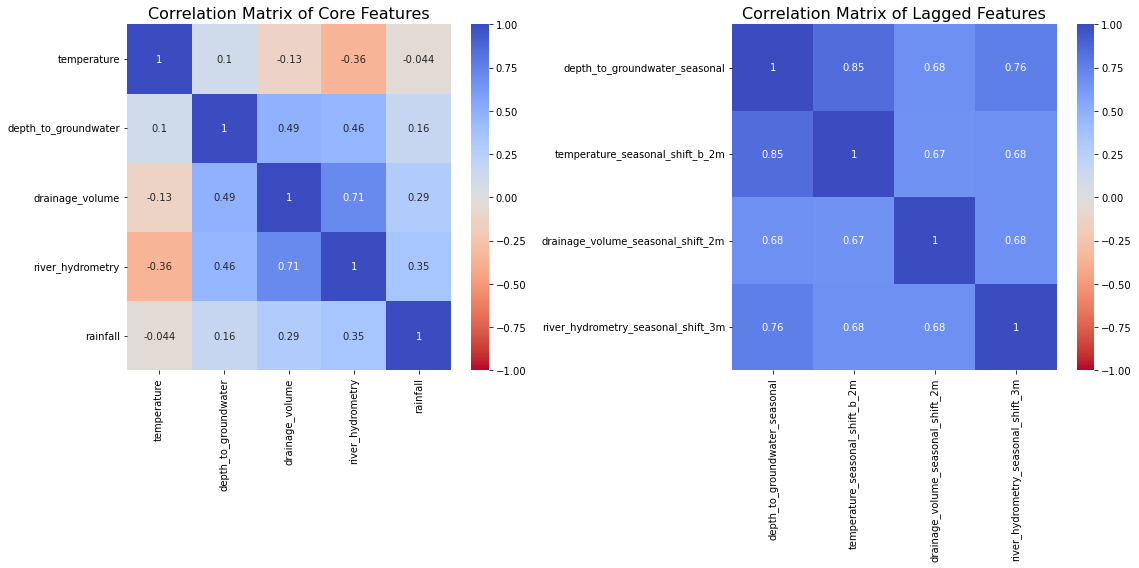

In [77]:
# Example placeholder for core_columns
core_columns = [
    'temperature', 'depth_to_groundwater', 'drainage_volume', 
    'river_hydrometry', 'rainfall'
]

# Example placeholder for shifted_cols
shifted_cols = [
    'depth_to_groundwater_seasonal',         
    'temperature_seasonal_shift_b_2m',
    'drainage_volume_seasonal_shift_2m', 
    'river_hydrometry_seasonal_shift_3m'
]

# Define the figure and axes
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

# Calculate and plot the correlation matrix for core features
corrmat_core = df[core_columns].corr()
sns.heatmap(corrmat_core, annot=True, vmin=-1, vmax=1, cmap='coolwarm_r', ax=ax[0])
ax[0].set_title('Correlation Matrix of Core Features', fontsize=16)

# Calculate and plot the correlation matrix for shifted features
corrmat_shifted = df[shifted_cols].corr()
sns.heatmap(corrmat_shifted, annot=True, vmin=-1, vmax=1, cmap='coolwarm_r', ax=ax[1])
ax[1].set_title('Correlation Matrix of Lagged Features', fontsize=16)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

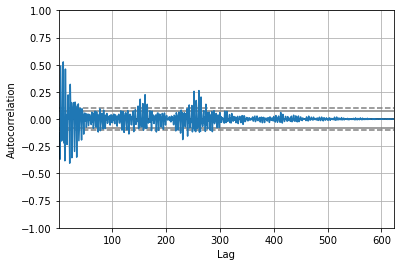

In [78]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df['depth_to_groundwater_diff_1'])
plt.show()

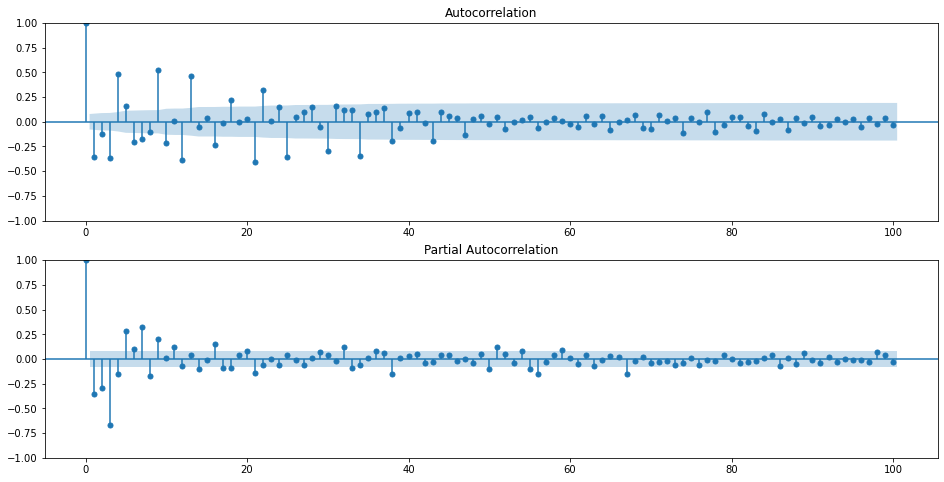

In [79]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

f, ax = plt.subplots(nrows=2, ncols=1, figsize=(16, 8))

plot_acf(df['depth_to_groundwater_diff_1'], lags=100, ax=ax[0])
plot_pacf(df['depth_to_groundwater_diff_1'], lags=100, ax=ax[1])

plt.show()

In [81]:
from sklearn.model_selection import TimeSeriesSplit

N_SPLITS = 3

X = df.index
y = df['depth_to_groundwater']

folds = TimeSeriesSplit(n_splits=N_SPLITS)

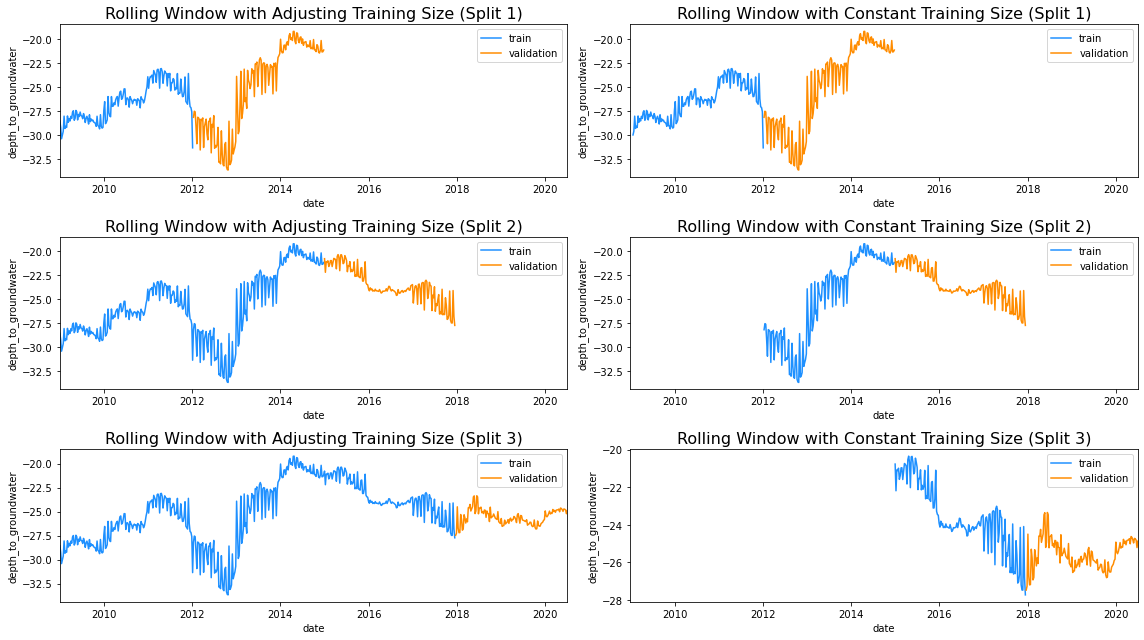

In [82]:
f, ax = plt.subplots(nrows=N_SPLITS, ncols=2, figsize=(16, 9))

for i, (train_index, valid_index) in enumerate(folds.split(X)):
    X_train, X_valid = X[train_index], X[valid_index]
    y_train, y_valid = y[train_index], y[valid_index]

    sns.lineplot(
        x=X_train, 
        y=y_train, 
        ax=ax[i,0], 
        color='dodgerblue', 
        label='train'
    )
    sns.lineplot(
        x=X_train[len(X_train) - len(X_valid):(len(X_train) - len(X_valid) + len(X_valid))], 
        y=y_train[len(X_train) - len(X_valid):(len(X_train) - len(X_valid) + len(X_valid))], 
        ax=ax[i,1], 
        color='dodgerblue', 
        label='train'
    )

    for j in range(2):
        sns.lineplot(x= X_valid, y= y_valid, ax=ax[i, j], color='darkorange', label='validation')
    ax[i, 0].set_title(f"Rolling Window with Adjusting Training Size (Split {i+1})", fontsize=16)
    ax[i, 1].set_title(f"Rolling Window with Constant Training Size (Split {i+1})", fontsize=16)

for i in range(N_SPLITS):
    ax[i, 0].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])
    ax[i, 1].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])
    
plt.tight_layout()
plt.show()

In [87]:
train_size = int(0.85 * len(df))
test_size = len(df) - train_size

df_reset = df.reset_index()

# Create a new DataFrame with the index column and the specific column
univariate_df = df_reset[[df.index.name, 'depth_to_groundwater']].copy()
univariate_df.columns = ['ds', 'y']

train = univariate_df.iloc[:train_size, :]

x_train, y_train = pd.DataFrame(univariate_df.iloc[:train_size, 0]), pd.DataFrame(univariate_df.iloc[:train_size, 1])
x_valid, y_valid = pd.DataFrame(univariate_df.iloc[train_size:, 0]), pd.DataFrame(univariate_df.iloc[train_size:, 1])

print(len(train), len(x_valid))

529 94


In [90]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

from fbprophet import Prophet


# Train the model
model = Prophet()
model.fit(train)

# x_valid = model.make_future_dataframe(periods=test_size, freq='w')

# Predict on valid set
y_pred = model.predict(x_valid)

# Calcuate metrics
score_mae = mean_absolute_error(y_valid, y_pred.tail(test_size)['yhat'])
score_rmse = math.sqrt(mean_squared_error(y_valid, y_pred.tail(test_size)['yhat']))

print(Fore.GREEN + 'RMSE: {}'.format(score_rmse))

  copying pystan\stan\src\stan\lang\generator.hpp -> build\lib.win-amd64-3.9\pystan\stan\src\stan\lang
  copying pystan\stan\src\stan\lang\parser.hpp -> build\lib.win-amd64-3.9\pystan\stan\src\stan\lang
  copying pystan\stan\src\stan\lang\rethrow_located.hpp -> build\lib.win-amd64-3.9\pystan\stan\src\stan\lang
  creating build\lib.win-amd64-3.9\pystan\stan\src\stan\lang\ast
  copying pystan\stan\src\stan\lang\ast\nil.hpp -> build\lib.win-amd64-3.9\pystan\stan\src\stan\lang\ast
  copying pystan\stan\src\stan\lang\ast\origin_block.hpp -> build\lib.win-amd64-3.9\pystan\stan\src\stan\lang\ast
  copying pystan\stan\src\stan\lang\ast\scope.hpp -> build\lib.win-amd64-3.9\pystan\stan\src\stan\lang\ast
  copying pystan\stan\src\stan\lang\ast\scope_def.hpp -> build\lib.win-amd64-3.9\pystan\stan\src\stan\lang\ast
  copying pystan\stan\src\stan\lang\ast\variable_map.hpp -> build\lib.win-amd64-3.9\pystan\stan\src\stan\lang\ast
  copying pystan\stan\src\stan\lang\ast\variable_map_def.hpp -> build\li

  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\asio\detail\null_reactor.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\asio\detail
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\asio\detail\null_signal_blocker.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\asio\detail
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\asio\detail\null_socket_service.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\asio\detail
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\asio\detail\null_static_mutex.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\asio\detail
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\asio\detail\null_thread.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\asio\detail
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\asio\detail\null_tss_ptr.hpp -> build\lib.w

  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\atomic\detail\extra_ops_gcc_ppc.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\atomic\detail
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\atomic\detail\extra_ops_gcc_x86.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\atomic\detail
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\atomic\detail\extra_ops_generic.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\atomic\detail
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\atomic\detail\extra_ops_msvc_arm.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\atomic\detail
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\atomic\detail\extra_ops_msvc_x86.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\atomic\detail
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\atomic\detail\

  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\beast\core\detail\bind_handler.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\beast\core\detail
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\beast\core\detail\buffer.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\beast\core\detail
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\beast\core\detail\buffers_ref.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\beast\core\detail
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\beast\core\detail\chacha.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\beast\core\detail
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\beast\core\detail\clamp.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\beast\core\detail
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\beast\core\detail\con

ModuleNotFoundError: No module named 'fbprophet'


  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\compute\algorithm\for_each_n.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\compute\algorithm
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\compute\algorithm\gather.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\compute\algorithm
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\compute\algorithm\generate.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\compute\algorithm
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\compute\algorithm\generate_n.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\compute\algorithm
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\compute\algorithm\includes.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\compute\algorithm
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\compute\algorithm\

  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\container_hash\extensions.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\container_hash
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\container_hash\hash.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\container_hash
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\container_hash\hash_fwd.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\container_hash
  creating build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\container_hash\detail
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\container_hash\detail\float_functions.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\container_hash\detail
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\container_hash\detail\hash_float.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69

  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\convert\strtol.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\convert
  creating build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\convert\detail
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\convert\detail\char.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\convert\detail
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\convert\detail\config.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\convert\detail
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\convert\detail\has_member.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\convert\detail
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\convert\detail\is_callable.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\convert\detail
  copying pystan\stan\lib\st

  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\date_time\locale_config.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\date_time
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\date_time\local_timezone_defs.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\date_time
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\date_time\local_time_adjustor.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\date_time
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\date_time\microsec_time_clock.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\date_time
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\date_time\parse_format_base.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\date_time
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\date_time\period.hpp -> build\lib.win-amd64-3.9\pystan

  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\function_types\detail\pp_arity_loop.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\function_types\detail
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\function_types\detail\pp_loop.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\function_types\detail
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\function_types\detail\retag_default_cc.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\function_types\detail
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\function_types\detail\synthesize.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\function_types\detail
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\function_types\detail\to_sequence.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\function_types\detail
  creating build\lib.wi

  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\fusion\container\vector\detail\cpp03\preprocessed\vector_chooser.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\fusion\container\vector\detail\cpp03\preprocessed
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\fusion\container\vector\detail\cpp03\preprocessed\vector_chooser10.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\fusion\container\vector\detail\cpp03\preprocessed
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\fusion\container\vector\detail\cpp03\preprocessed\vector_chooser20.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\fusion\container\vector\detail\cpp03\preprocessed
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\fusion\container\vector\detail\cpp03\preprocessed\vector_chooser30.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\fusion\container\vector\deta

  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\fusion\mpl\push_front.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\fusion\mpl
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\fusion\mpl\size.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\fusion\mpl
  creating build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\fusion\mpl\detail
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\fusion\mpl\detail\clear.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\fusion\mpl\detail
  creating build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\fusion\sequence
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\fusion\sequence\comparison.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\fusion\sequence
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\fusion\sequence\convert.hpp -> build\l

  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\geometry\index\detail\algorithms\diff_abs.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\geometry\index\detail\algorithms
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\geometry\index\detail\algorithms\intersection_content.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\geometry\index\detail\algorithms
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\geometry\index\detail\algorithms\is_valid.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\geometry\index\detail\algorithms
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\geometry\index\detail\algorithms\margin.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\geometry\index\detail\algorithms
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\geometry\index\detail\algorithms\minmaxdist.hpp -> build\lib.win-amd64-3.9\

  creating build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\gil\extension\io\pnm
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\gil\extension\io\pnm\old.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\gil\extension\io\pnm
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\gil\extension\io\pnm\read.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\gil\extension\io\pnm
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\gil\extension\io\pnm\tags.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\gil\extension\io\pnm
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\gil\extension\io\pnm\write.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\gil\extension\io\pnm
  creating build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\gil\extension\io\pnm\detail
  copying pystan\stan\lib\stan_math\lib

  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\hana\detail\hash_table.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\hana\detail
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\hana\detail\has_common_embedding.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\hana\detail
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\hana\detail\has_duplicates.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\hana\detail
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\hana\detail\index_if.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\hana\detail
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\hana\detail\integral_constant.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\hana\detail
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\hana\detail\intrinsics.hpp -> build\lib.win-amd64-3.

  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\interprocess\detail\shared_dir_helpers.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\interprocess\detail
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\interprocess\detail\simple_swap.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\interprocess\detail
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\interprocess\detail\std_fwd.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\interprocess\detail
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\interprocess\detail\transform_iterator.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\interprocess\detail
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\interprocess\detail\type_traits.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\interprocess\detail
  copying pystan\stan\lib\stan_math

  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\log\detail\light_rw_mutex.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\log\detail
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\log\detail\locking_ptr.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\log\detail
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\log\detail\locks.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\log\detail
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\log\detail\named_scope_fmt_pp.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\log\detail
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\log\detail\native_typeof.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\log\detail
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\log\detail\parameter_tools.hpp -> build\lib.win-amd64-3.9\pystan\stan\

  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\math\distributions\detail\generic_mode.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\math\distributions\detail
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\math\distributions\detail\generic_quantile.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\math\distributions\detail
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\math\distributions\detail\hypergeometric_cdf.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\math\distributions\detail
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\math\distributions\detail\hypergeometric_pdf.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\math\distributions\detail
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\math\distributions\detail\hypergeometric_quantile.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\li

  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\mpl\aux_\msvc_dtw.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\mpl\aux_
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\mpl\aux_\msvc_eti_base.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\mpl\aux_
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\mpl\aux_\msvc_is_class.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\mpl\aux_
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\mpl\aux_\msvc_never_true.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\mpl\aux_
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\mpl\aux_\msvc_type.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\mpl\aux_
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\mpl\aux_\na.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\m

  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\mpl\vector\aux_\preprocessed\typeof_based\vector30_c.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\mpl\vector\aux_\preprocessed\typeof_based
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\mpl\vector\aux_\preprocessed\typeof_based\vector40.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\mpl\vector\aux_\preprocessed\typeof_based
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\mpl\vector\aux_\preprocessed\typeof_based\vector40_c.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\mpl\vector\aux_\preprocessed\typeof_based
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\mpl\vector\aux_\preprocessed\typeof_based\vector50.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\mpl\vector\aux_\preprocessed\typeof_based
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\mpl\vecto

  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\multi_index\detail\rnd_index_ptr_array.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\multi_index\detail
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\multi_index\detail\rnd_node_iterator.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\multi_index\detail
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\multi_index\detail\rnk_index_ops.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\multi_index\detail
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\multi_index\detail\safe_mode.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\multi_index\detail
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\multi_index\detail\scope_guard.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\multi_index\detail
  copying pystan\stan\lib\stan_math\lib\b

  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\numeric\ublas\operation\begin.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\numeric\ublas\operation
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\numeric\ublas\operation\c_array.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\numeric\ublas\operation
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\numeric\ublas\operation\end.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\numeric\ublas\operation
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\numeric\ublas\operation\num_columns.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\numeric\ublas\operation
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\numeric\ublas\operation\num_rows.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\numeric\ublas\operation
  copying pystan\stan\lib\

  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\predef\architecture\ia64.h -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\predef\architecture
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\predef\architecture\m68k.h -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\predef\architecture
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\predef\architecture\mips.h -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\predef\architecture
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\predef\architecture\parisc.h -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\predef\architecture
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\predef\architecture\ppc.h -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\predef\architecture
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\predef\architecture\ptx.h -> b

  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\process\detail\posix\group_ref.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\process\detail\posix
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\process\detail\posix\handler.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\process\detail\posix
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\process\detail\posix\io_context_ref.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\process\detail\posix
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\process\detail\posix\is_running.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\process\detail\posix
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\process\detail\posix\null_in.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\process\detail\posix
  copying pystan\stan\lib\stan_math\lib\boo

  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\proto\transform\pass_through.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\proto\transform
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\proto\transform\when.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\proto\transform
  creating build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\proto\transform\detail
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\proto\transform\detail\call.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\proto\transform\detail
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\proto\transform\detail\construct_funop.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\proto\transform\detail
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\proto\transform\detail\construct_pod_funop.hpp -> build\lib.win-amd64-3.9\pystan\st

  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\range\algorithm\fill.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\range\algorithm
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\range\algorithm\fill_n.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\range\algorithm
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\range\algorithm\find.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\range\algorithm
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\range\algorithm\find_end.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\range\algorithm
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\range\algorithm\find_first_of.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\range\algorithm
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\range\algorithm\find_if.hpp -> build\lib.win-a

  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\spirit\home\classic\actor\ref_const_ref_const_ref_a.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\spirit\home\classic\actor
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\spirit\home\classic\actor\ref_const_ref_value_actor.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\spirit\home\classic\actor
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\spirit\home\classic\actor\ref_value_actor.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\spirit\home\classic\actor
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\spirit\home\classic\actor\swap_actor.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\spirit\home\classic\actor
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\spirit\home\classic\actor\typeof.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boos

  creating build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\spirit\home\qi\nonterminal
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\spirit\home\qi\nonterminal\debug_handler.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\spirit\home\qi\nonterminal
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\spirit\home\qi\nonterminal\debug_handler_state.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\spirit\home\qi\nonterminal
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\spirit\home\qi\nonterminal\error_handler.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\spirit\home\qi\nonterminal
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\spirit\home\qi\nonterminal\grammar.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\spirit\home\qi\nonterminal
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\sp

  creating build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\spirit\repository\home
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\spirit\repository\home\karma.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\spirit\repository\home
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\spirit\repository\home\qi.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\spirit\repository\home
  creating build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\spirit\repository\home\karma
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\spirit\repository\home\karma\directive.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\spirit\repository\home\karma
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\spirit\repository\home\karma\nonterminal.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\spirit\reposit

  creating build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\thread\experimental\config
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\thread\experimental\config\inline_namespace.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\thread\experimental\config
  creating build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\thread\experimental\parallel
  creating build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\thread\experimental\parallel\v1
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\thread\experimental\parallel\v1\exception_list.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\thread\experimental\parallel\v1
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\thread\experimental\parallel\v1\inline_namespace.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\thread\experimental\parallel\v1
  creating b

  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\units\base_units\angle\arcminute.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\units\base_units\angle
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\units\base_units\angle\arcsecond.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\units\base_units\angle
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\units\base_units\angle\degree.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\units\base_units\angle
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\units\base_units\angle\gradian.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\units\base_units\angle
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\units\base_units\angle\radian.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\units\base_units\angle
  copying pystan\stan\lib\stan_ma

  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\xpressive\regex_algorithms.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\xpressive
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\xpressive\regex_compiler.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\xpressive
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\xpressive\regex_constants.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\xpressive
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\xpressive\regex_error.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\xpressive
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\xpressive\regex_iterator.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\xpressive
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\xpressive\regex_primitives.hpp -> build\lib.win-amd64-3.9\pystan\stan\l

  copying pystan\stan\lib\stan_math\lib\eigen_3.3.3\Eigen\src\Core\arch\AVX\Complex.h -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\eigen_3.3.3\Eigen\src\Core\arch\AVX
  copying pystan\stan\lib\stan_math\lib\eigen_3.3.3\Eigen\src\Core\arch\AVX\MathFunctions.h -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\eigen_3.3.3\Eigen\src\Core\arch\AVX
  copying pystan\stan\lib\stan_math\lib\eigen_3.3.3\Eigen\src\Core\arch\AVX\PacketMath.h -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\eigen_3.3.3\Eigen\src\Core\arch\AVX
  copying pystan\stan\lib\stan_math\lib\eigen_3.3.3\Eigen\src\Core\arch\AVX\TypeCasting.h -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\eigen_3.3.3\Eigen\src\Core\arch\AVX
  creating build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\eigen_3.3.3\Eigen\src\Core\arch\AVX512
  copying pystan\stan\lib\stan_math\lib\eigen_3.3.3\Eigen\src\Core\arch\AVX512\MathFunctions.h -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\eigen_3.3.3\Eig

  copying pystan\stan\lib\stan_math\lib\sundials_4.1.0\include\sundials\sundials_fnvector.h -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\sundials_4.1.0\include\sundials
  copying pystan\stan\lib\stan_math\lib\sundials_4.1.0\include\sundials\sundials_iterative.h -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\sundials_4.1.0\include\sundials
  copying pystan\stan\lib\stan_math\lib\sundials_4.1.0\include\sundials\sundials_klu_impl.h -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\sundials_4.1.0\include\sundials
  copying pystan\stan\lib\stan_math\lib\sundials_4.1.0\include\sundials\sundials_lapack.h -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\sundials_4.1.0\include\sundials
  copying pystan\stan\lib\stan_math\lib\sundials_4.1.0\include\sundials\sundials_linearsolver.h -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\sundials_4.1.0\include\sundials
  copying pystan\stan\lib\stan_math\lib\sundials_4.1.0\include\sundials\sundials_math.h -> b

  copying pystan\stan\lib\stan_math\stan\math\prim\mat\fun\gp_exp_quad_cov.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\stan\math\prim\mat\fun
  copying pystan\stan\lib\stan_math\stan\math\prim\mat\fun\gp_matern32_cov.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\stan\math\prim\mat\fun
  copying pystan\stan\lib\stan_math\stan\math\prim\mat\fun\gp_matern52_cov.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\stan\math\prim\mat\fun
  copying pystan\stan\lib\stan_math\stan\math\prim\mat\fun\gp_periodic_cov.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\stan\math\prim\mat\fun
  copying pystan\stan\lib\stan_math\stan\math\prim\mat\fun\head.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\stan\math\prim\mat\fun
  copying pystan\stan\lib\stan_math\stan\math\prim\mat\fun\initialize.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\stan\math\prim\mat\fun
  copying pystan\stan\lib\stan_math\stan\math\prim\mat\fun\inv.hpp -> build\lib.win-am

  copying pystan\stan\lib\stan_math\stan\math\prim\scal\fun\log_modified_bessel_first_kind.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\stan\math\prim\scal\funIOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

    copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\proto\detail\static_const.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\proto\detail
    copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\proto\detail\template_arity.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\proto\detail
    copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\proto\detail\template_arity_helper.hpp -> build\lib.win-amd64-3.9\pystan\stan\

    copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\python\suite\indexing\indexing_suite.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\python\suite\indexing
    copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\python\suite\indexing\map_indexing_suite.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\python\suite\indexing
    copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\python\suite\indexing\vector_indexing_suite.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\python\suite\indexing
    creating build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\python\suite\indexing\detail
    copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\python\suite\indexing\detail\indexing_suite_detail.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\python\suite\indexing\detail
    creating build\lib.win-amd64-3.9\pystan\stan\lib\

    copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\range\detail\range_return.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\range\detail
    copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\range\detail\remove_extent.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\range\detail
    copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\range\detail\safe_bool.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\range\detail
    copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\range\detail\sfinae.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\range\detail
    copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\range\detail\sizer.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\range\detail
    copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\range\detail\size_type.hpp -> build\lib.win-amd64-3.9\

    copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\spirit\home\lex\lexer\terminals.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\spirit\home\lex\lexer
    copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\spirit\home\lex\lexer\token_def.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\spirit\home\lex\lexer
    creating build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\spirit\home\lex\lexer\lexertl
    copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\spirit\home\lex\lexer\lexertl\functor.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\spirit\home\lex\lexer\lexertl
    copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\spirit\home\lex\lexer\lexertl\functor_data.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\spirit\home\lex\lexer\lexertl
    copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\spirit\hom

    copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\spirit\include\classic_parse_tree_utils.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\spirit\include
    copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\spirit\include\classic_position_iterator.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\spirit\include
    copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\spirit\include\classic_position_iterator_fwd.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\spirit\include
    copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\spirit\include\classic_positive.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\spirit\include
    copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\spirit\include\classic_primitives.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\spirit\include
    copying pystan\stan\lib\

    copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\test\tools\collection_comparison_op.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\test\tools
    copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\test\tools\context.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\test\tools
    copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\test\tools\cstring_comparison_op.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\test\tools
    copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\test\tools\floating_point_comparison.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\test\tools
    copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\test\tools\fpc_op.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\test\tools
    copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\test\tools\fpc_tolerance.hpp -> buil

    copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\units\base_units\angle\arcsecond.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\units\base_units\angle
    copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\units\base_units\angle\degree.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\units\base_units\angle
    copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\units\base_units\angle\gradian.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\units\base_units\angle
    copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\units\base_units\angle\radian.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\units\base_units\angle
    copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\units\base_units\angle\revolution.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\units\base_units\angle
    copying pystan\sta

    creating build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\vmd
    copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\vmd\array.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\vmd
    copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\vmd\assert.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\vmd
    copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\vmd\assert_is_array.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\vmd
    copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\vmd\assert_is_empty.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\vmd
    copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\vmd\assert_is_identifier.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\vmd
    copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\vmd\assert_is_list.hpp -> build\lib.wi

    copying pystan\stan\lib\stan_math\lib\eigen_3.3.3\Eigen\src\Core\arch\AVX\TypeCasting.h -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\eigen_3.3.3\Eigen\src\Core\arch\AVX
    creating build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\eigen_3.3.3\Eigen\src\Core\arch\AVX512
    copying pystan\stan\lib\stan_math\lib\eigen_3.3.3\Eigen\src\Core\arch\AVX512\MathFunctions.h -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\eigen_3.3.3\Eigen\src\Core\arch\AVX512
    copying pystan\stan\lib\stan_math\lib\eigen_3.3.3\Eigen\src\Core\arch\AVX512\PacketMath.h -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\eigen_3.3.3\Eigen\src\Core\arch\AVX512
    creating build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\eigen_3.3.3\Eigen\src\Core\arch\CUDA
    copying pystan\stan\lib\stan_math\lib\eigen_3.3.3\Eigen\src\Core\arch\CUDA\Complex.h -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\eigen_3.3.3\Eigen\src\Core\arch\CUDA
    copying pystan\stan\lib\stan_math\l

    copying pystan\stan\lib\stan_math\lib\sundials_4.1.0\include\sundials\sundials_math.h -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\sundials_4.1.0\include\sundials
    copying pystan\stan\lib\stan_math\lib\sundials_4.1.0\include\sundials\sundials_matrix.h -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\sundials_4.1.0\include\sundials
    copying pystan\stan\lib\stan_math\lib\sundials_4.1.0\include\sundials\sundials_mpi.h -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\sundials_4.1.0\include\sundials
    copying pystan\stan\lib\stan_math\lib\sundials_4.1.0\include\sundials\sundials_mpi_types.h -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\sundials_4.1.0\include\sundials
    copying pystan\stan\lib\stan_math\lib\sundials_4.1.0\include\sundials\sundials_nonlinearsolver.h -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\sundials_4.1.0\include\sundials
    copying pystan\stan\lib\stan_math\lib\sundials_4.1.0\include\sundials\sundials_nvect

    copying pystan\stan\lib\stan_math\stan\math\opencl\opencl_context.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\stan\math\opencl
    copying pystan\stan\lib\stan_math\stan\math\opencl\subtract.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\stan\math\opencl
    copying pystan\stan\lib\stan_math\stan\math\opencl\transpose.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\stan\math\opencl
    creating build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\stan\math\opencl\err
    copying pystan\stan\lib\stan_math\stan\math\opencl\err\check_diagonal_zeros.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\stan\math\opencl\err
    copying pystan\stan\lib\stan_math\stan\math\opencl\err\check_matching_dims.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\stan\math\opencl\err
    copying pystan\stan\lib\stan_math\stan\math\opencl\err\check_nan.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\stan\math\opencl\err
    copying pystan\stan\lib\stan_

    copying pystan\stan\lib\stan_math\stan\math\prim\mat\fun\simplex_free.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\stan\math\prim\mat\fun
    copying pystan\stan\lib\stan_math\stan\math\prim\mat\fun\sin.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\stan\math\prim\mat\fun
    copying pystan\stan\lib\stan_math\stan\math\prim\mat\fun\singular_values.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\stan\math\prim\mat\fun
    copying pystan\stan\lib\stan_math\stan\math\prim\mat\fun\sinh.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\stan\math\prim\mat\fun
    copying pystan\stan\lib\stan_math\stan\math\prim\mat\fun\size.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\stan\math\prim\mat\fun
    copying pystan\stan\lib\stan_math\stan\math\prim\mat\fun\softmax.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\stan\math\prim\mat\fun
    copying pystan\stan\lib\stan_math\stan\math\prim\mat\fun\sort_asc.hpp -> build\lib.win-amd64-3.9\py

In [96]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA  # Updated import
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math
from colorama import Fore  # For colored output

# Fit ARIMA model
model = ARIMA(y_train, order=(1,1,1))
model_fit = model.fit()

# Forecast
y_pred = model_fit.forecast(steps=len(y_valid))  # Predict for the length of y_valid

# Calculate metrics
score_mae = mean_absolute_error(y_valid, y_pred)
score_rmse = math.sqrt(mean_squared_error(y_valid, y_pred))

# Print results
print(Fore.GREEN + 'RMSE: {}'.format(score_rmse))


RMSE: 0.886151584573963


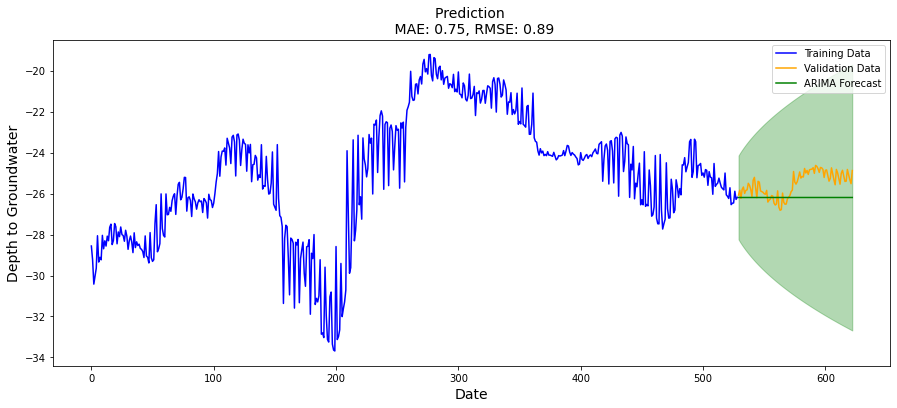

In [99]:
# Forecast
forecast_steps = len(y_valid)
forecast = model_fit.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Calculate metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

score_mae = mean_absolute_error(y_valid, forecast_mean)
score_rmse = math.sqrt(mean_squared_error(y_valid, forecast_mean))

# Plot
f, ax = plt.subplots(1, figsize=(15, 6))
ax.plot(y_train.index, y_train, label='Training Data', color='blue')
ax.plot(y_valid.index, y_valid, label='Validation Data', color='orange')
ax.plot(y_valid.index, forecast_mean, label='ARIMA Forecast', color='green')

# Plot confidence intervals
ax.fill_between(y_valid.index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='green', alpha=0.3)

ax.set_title(f'Prediction \n MAE: {score_mae:.2f}, RMSE: {score_rmse:.2f}', fontsize=14)
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Depth to Groundwater', fontsize=14)
ax.legend()
plt.show()
